In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
cnx = sqlite3.connect('database.sqlite')
frame = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
frame.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [5]:
frame.shape

(183978, 42)

In [6]:
frame.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [8]:
#Remove unwanted columns which corresponds to id
frame = frame.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1)

In [9]:
#Drop all Non-Null values
frame.dropna(subset=['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'], how='all', inplace=True)

In [10]:
frame.isnull().sum()

overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle         1877
gk_diving                 0
gk_handling               0
gk_kicking          

In [11]:
# fill nan in df['attacking_work_rate']
frame['attacking_work_rate'].fillna(method='ffill',inplace=True,axis=0)

In [12]:
#convert categorical into individual columns
attacking_work_rate_dummies = pd.get_dummies(frame['attacking_work_rate'],prefix='attacking_work_rate').iloc[:, 1:]
attacking_work_rate_dummies.head(2)

,attacking_work_rate_high,attacking_work_rate_le,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_norm,attacking_work_rate_stoc,attacking_work_rate_y
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0


In [22]:
frame['volleys'].fillna((frame['volleys'].mean()), inplace=True)

In [23]:
frame['curve'].fillna((frame['curve'].mean()), inplace=True)

In [24]:
frame['agility'].fillna((frame['agility'].mean()), inplace=True)

In [25]:
frame['balance'].fillna((frame['balance'].mean()), inplace=True)

In [26]:
frame['jumping'].fillna((frame['jumping'].mean()), inplace=True)

In [27]:
frame['vision'].fillna((frame['vision'].mean()), inplace=True)

In [28]:
frame['sliding_tackle'].fillna((frame['sliding_tackle'].mean()), inplace=True)

In [29]:
frame.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [30]:
# creating dummies to object datatype dataset
preferred_foot_dummies = pd.get_dummies(frame['preferred_foot'],prefix='preferred_foot')
preferred_foot_dummies.head(2)

,preferred_foot_left,preferred_foot_right
0,0,1
1,0,1


In [31]:
frame['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [32]:
defensive_work_rate_dummies = pd.get_dummies(frame['defensive_work_rate'],prefix='defensive_work_rate').iloc[:, 1:]
defensive_work_rate_dummies.head(2)

,defensive_work_rate_1,defensive_work_rate_2,defensive_work_rate_3,defensive_work_rate_4,defensive_work_rate_5,defensive_work_rate_6,defensive_work_rate_7,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
attacking_work_rate_dummies = pd.get_dummies(frame['attacking_work_rate'],prefix='attacking_work_rate').iloc[:, 1:]
attacking_work_rate_dummies.head(2)

,attacking_work_rate_high,attacking_work_rate_le,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_norm,attacking_work_rate_stoc,attacking_work_rate_y
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0


In [34]:
frame = frame.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1)

In [35]:
frame = pd.concat([frame, attacking_work_rate_dummies,defensive_work_rate_dummies,preferred_foot_dummies], axis=1)

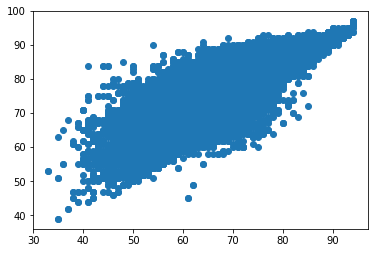

In [43]:
import matplotlib.pyplot as plt
plt.scatter(frame['overall_rating'],frame['potential'])
plt.show()

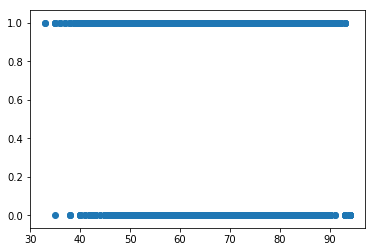

In [44]:
plt.scatter(frame['overall_rating'],frame['preferred_foot_right'])
plt.show()

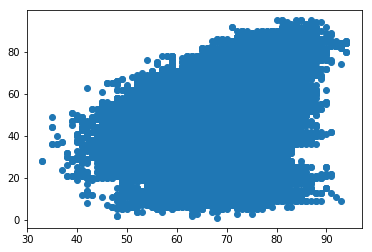

In [45]:
plt.scatter(frame['overall_rating'],frame['crossing'])
plt.show()

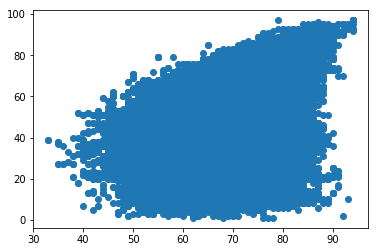

In [46]:
plt.scatter(frame['overall_rating'],frame['finishing'])
plt.show()

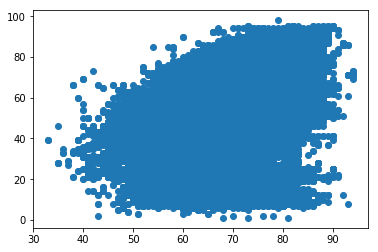

In [47]:
plt.scatter(frame['overall_rating'],frame['heading_accuracy'])
plt.show()

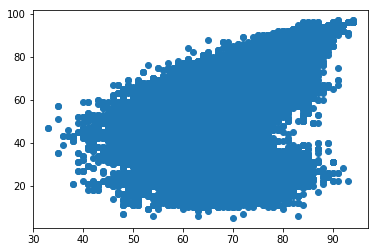

In [49]:
plt.scatter(frame['overall_rating'],frame['ball_control'])
plt.show()

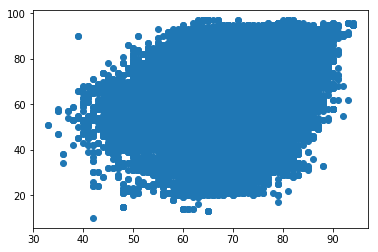

In [50]:
plt.scatter(frame['overall_rating'],frame['acceleration'])
plt.show()

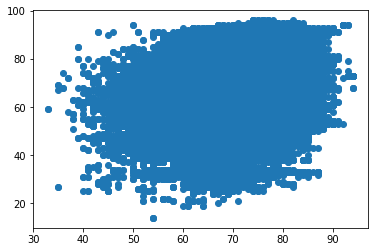

In [51]:
plt.scatter(frame['overall_rating'],frame['jumping'])
plt.show()

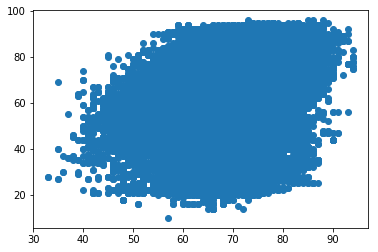

In [52]:
plt.scatter(frame['overall_rating'],frame['stamina'])
plt.show()

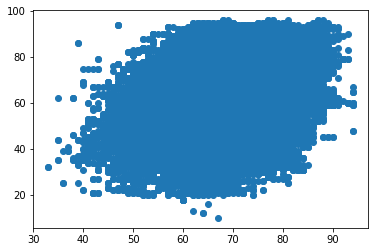

In [53]:
plt.scatter(frame['overall_rating'],frame['strength'])
plt.show()

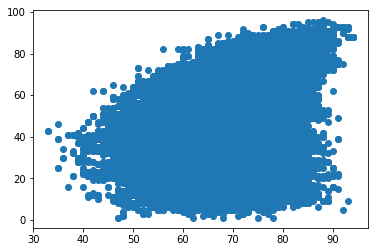

In [54]:
plt.scatter(frame['overall_rating'],frame['long_shots'])
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
req_df = ['potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'attacking_work_rate_high', 'attacking_work_rate_le',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'attacking_work_rate_norm', 'attacking_work_rate_stoc',
       'attacking_work_rate_y', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_work_rate_5',
       'defensive_work_rate_6', 'defensive_work_rate_7',
       'defensive_work_rate_8', 'defensive_work_rate_9',
       'defensive_work_rate__0', 'defensive_work_rate_ean',
       'defensive_work_rate_es', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium',
       'defensive_work_rate_o', 'defensive_work_rate_ormal',
       'defensive_work_rate_tocky', 'preferred_foot_right','preferred_foot_left']
req_df = frame[req_df]
target = frame['overall_rating']

### Linear Regression

In [56]:
y = frame['overall_rating']
X = frame.drop(['overall_rating'],axis=1)

In [57]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

In [58]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# predict class labels for the test set
pred = linear.predict(X_test)

In [61]:
linear.score(X_test,y_test)

0.84427333620240952

In [64]:
mean_squared_error(y_test,pred)

7.714360532756352

## Linear Regression Using Cross-Validation

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print(scores)
print(scores.mean())

[ 0.84633621  0.83781134  0.84210489  0.84247875  0.84491489]
0.842729215882


We got 84.27% accuracy which is our R2 value, good model

## Decision Tree Regressor

In [70]:
tree = DecisionTreeRegressor(max_depth=12)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [71]:
pred_tree = tree.predict(X_test)
tree.score(X_test,y_test)

0.9227783676202661

## DecisionTreeRegressor with Cross Validation

In [73]:
scores = cross_val_score(DecisionTreeRegressor(max_depth=12), X, y, cv=5)
print(scores)
print(scores.mean())

[ 0.89600346  0.88893507  0.89266943  0.8916638   0.89878937]
0.893612225571


Here,we got much better accuracy than Linear Regression which accounts true that DecisionTress are better models

In [74]:
mean_squared_error(y_test,pred_tree)

3.8253918666076019

In [75]:
y_test[:5]

146607    71.0
139941    66.0
179331    73.0
173084    62.0
180023    77.0
Name: overall_rating, dtype: float64

In [76]:
pred_tree[:5]

array([ 71.84615385,  63.87485779,  72.68852459,  62.80769231,  79.89090909])

## RMSE for Decision Tree Regressor

In [77]:
np.sqrt(mean_squared_error(y_test,pred_tree))

1.9558609016511379